In [1]:
import operator as op
import math
import numpy as np
#from itertools import combinations
from collections import Counter

import networkx as nx
from networkx.algorithms import node_classification
import matplotlib.pyplot as plt


In [2]:
N=100 #number of students
C=20 #number of classes
mu=15.0 #avg number of students per class
sd=5.0 #std dev of students per class

In [3]:
floorfunc=np.vectorize(math.floor)
Cn=floorfunc(np.random.normal(mu,sd,size=(C,1))) #sampling class size N(15,5^2),capped at N
#print(Cn)

In [4]:
A1temp=np.zeros((N,C)) #adjacency matrix

for i in range(C): #loop through each class
    currentS=np.random.choice(N,Cn[i],replace=False)
    #random sample from students to decide which students are in current class
    #print(currentS)
    A1temp[currentS,i]=1 
    #print(A1temp[:,i])

In [5]:
# #block comment our inefficient way of getting adjacency matrix
# A1orig=np.zeros((N,N))

# for i in range(C): #loop through each class
#     currentS=np.random.choice(N,size=(int(Cn[i]),1),replace=False)
#     print(currentS) #random sample from students to decide which students are in current class

#     currentA=combinations(currentS,2) #find all connections to be filled in adjacency matrix
#     for j in list(currentA):
#         A1orig[j[0],j[1]]=1
#         A1orig[j[1],j[0]]=1

In [6]:
A1=np.matmul(A1temp,np.transpose(A1temp))
np.fill_diagonal(A1, 0)
A1[A1>0]=1
    
#print(A1)
print(sum(A1))

#check for symmetry
print(sum(sum(np.transpose(A1)-A1)))

[53. 42. 61. 63. 20.  9. 66. 40. 42. 46. 62. 24. 58. 68.  8. 52. 59. 51.
 60. 54. 12. 53. 21. 27. 30. 58. 60. 30. 44. 46. 57. 40. 61. 47. 51. 30.
 31. 67. 46.  0. 59. 32. 41. 50.  8. 40.  0. 36. 40. 26. 47. 42. 37. 42.
 26. 32. 43. 36. 40.  0. 50.  0. 37. 46. 59. 29. 26. 38. 29. 42. 14. 37.
 33. 44. 55. 32. 30. 42. 40. 34. 61.  8. 27. 24. 32. 14.  8. 35. 61. 38.
 65. 36. 36. 43. 52. 53.  0. 68. 37. 67.]
0.0


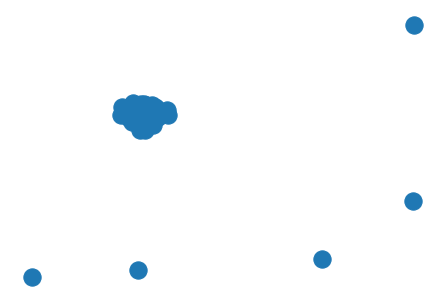

In [7]:
#plot A1
G1=nx.Graph()
G1.add_nodes_from([i for i in range(N)])
#nx.draw(G)
for i in range(N): 
    for j in range(i, N):
        if A1[i,j]==1:
            G1.add_edge(i,j)
        else: continue

nx.draw(G1)

[39 46 59 61 96]
(95, 95)


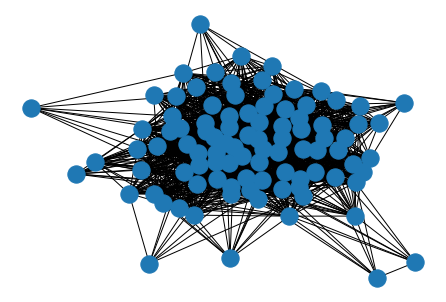

In [8]:
#plot A1, but exclude those are not connected to the rest of graph,
excludeNode1=sum(A1)==0
#print(excludeNode1)
excludeNodeIndex=np.where(excludeNode1)[0]
print(excludeNodeIndex)

nodeLeft1=sum(excludeNode1==False)
if nodeLeft1<N:
    A1exclude=np.reshape(A1,(N,N))
    A1exclude=np.delete(A1exclude,excludeNodeIndex,0)
    A1exclude=np.delete(A1exclude,excludeNodeIndex,1)
    #print(A1exclude)
    print(A1exclude.shape)

    G1v2=nx.Graph()
    G1v2.add_nodes_from([i for i in range(nodeLeft1)])
    #nx.draw(G)
    for i in range(nodeLeft1):
        for j in range(i, nodeLeft1):
            if A1exclude[i,j]==1:
                G1v2.add_edge(i,j)
            else: continue

    nx.draw(G1v2)

Following is the second method, where we have a number of majors and students, as well as courses, are allocated across majors. Therefore, this method should have clusters that are more concentrated while still connected.

In [9]:
M=4 #number of majors. Here in second method, we incorporate the ideas of having majors 
#and different students have priority taking their major core courses
plug=0.1
perc=0.8 #the percentage of students of each class that are limited to major students

mp=np.append(np.repeat((1-plug)/(M-1),M-1),plug) #probability vector for each student to be one of the four major
MS=np.random.multinomial(N,mp) #number of studetns randomly allocated to the M majors
cumMS=np.cumsum(MS)
cumMS=np.insert(cumMS,0,0)

print(MS)
print(cumMS)

#create a vector of majors, to be used later when plotting graph/network
MSmajor=np.repeat(range(M),MS) #each int value denotes a major
#print(MSmajor)



[35 29 29  7]
[  0  35  64  93 100]


In [10]:
CS=np.random.multinomial(C,mp); #number of classes opened by the M majors respectively
cumCS=np.cumsum(CS)
cumCS=np.insert(cumCS,0,0)

print(CS)
print(cumCS)

[6 5 8 1]
[ 0  6 11 19 20]


In [11]:
A2temp=np.zeros((N,C))
#A2orig=np.zeros((N,N))

for i in range(C): #loop through each class
    for j in range(M):
        if i<cumCS[j+1] and i>=cumCS[j]:
            inMajorS=min(int(Cn[i]*perc),MS[j]) #assume a centrain percentage are in-major students, controlled by perc
                                                #but capped at the max possible students taking this major
            outMajorS=Cn[i]-inMajorS
            #print(inMajorS)
            #print(outMajorS)
            
            currentInMajorPopulation=range(cumMS[j],cumMS[j+1])
            currentOutMajorPopulation=np.delete(range(N),range(cumMS[j],cumMS[j+1]))
            #print(currentInMajorPopulation)
            #print(currentOutMajorPopulation)
        
    currentInMajorS=np.random.choice(currentInMajorPopulation,inMajorS,replace=False)
    currentOutMajorS=np.random.choice(currentOutMajorPopulation,outMajorS[0],replace=False)
    #print(currentInMajorS)
    #print(currentOutMajorS)
            
    currentS=np.append(currentInMajorS,currentOutMajorS)
    A2temp[currentS,i]=1
    #print(A2temp[:,i])

#     currentA=combinations(currentS,2) #find all connections to be filled in adjacency matrix
#     for k in list(currentA):
#         A2orig[k[0],k[1]]=1
#         A2orig[k[1],k[0]]=1
        

In [12]:
# #inefficient way of mapping out adjacency matrix
# A2orig=np.zeros((N,N))
# for i in range(C): #loop through each class
#     for j in range(M):
#         currentOutMajorPopulation=np.delete(range(N),range(cumMS[j],cumMS[j+1]))
#         #print(currentOutMajorPopulation)
#         if i<cumCS[j+1] and i>=cumCS[j]:
#             inMajorS=min(int(Cn[i]*perc),MS[j]) #assume 80% are in-major students, 
#                                                      #but capped at the max possible students taking this major
#             outMajorS=Cn[i]-inMajorS
#             #print(inMajorS)
#             #print(outMajorS)
#             currentInMajorS=cumMS[j]+np.random.choice(MS[j],size=(inMajorS,1),replace=False)
#             currentOutMajorS=np.random.choice(currentOutMajorPopulation,size=(outMajorS[0],1),replace=False)
#             #print(currentInMajorS)
#             #print(currentOutMajorS)
            
#         currentS=np.append(currentInMajorS,currentOutMajorS);
#         currentA=combinations(currentS,2) #find all connections to be filled in adjacency matrix
#         for k in list(currentA):
#             A2orig[k[0],k[1]]=1
#             A2orig[k[1],k[0]]=1

In [13]:
A2=np.matmul(A2temp,np.transpose(A2temp))
np.fill_diagonal(A2, 0)
A2[A2>0]=1

print(A2)
#print(sum(sum(A2-A2orig)))

print(sum(A2))

#check for symmetry
print(sum(sum(np.transpose(A2)-A2)))

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 1. 0.]]
[47. 24. 55. 24. 14. 24. 59. 35.  0. 46. 18. 41. 47. 54. 51. 34. 64. 38.
 47. 42. 47. 65. 49. 39. 20. 38. 47. 32. 42. 40. 50. 59. 22. 57. 32. 45.
 38. 29. 20. 23. 31.  8. 43. 22.  0. 41. 47.  0. 63. 29. 55. 42. 47. 39.
 25. 20. 36. 46.  8. 24. 34. 31. 14.  0. 39. 56. 31. 56. 36. 28.  0. 38.
 32. 42. 33. 36. 36. 51. 68. 33. 35. 32. 59. 51. 33. 27. 58. 39. 31. 34.
 35. 49. 26. 28. 19. 19. 33. 19. 35. 30.]
0.0


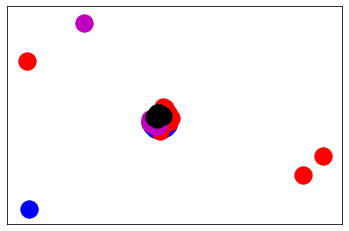

In [17]:
#plot A2
G2=nx.Graph()
G2.add_nodes_from([i for i in range(N)],major=MSmajor)

G2edgeSame=np.empty((0,2))
G2edgeDiff=np.empty((0,2))

for i in range(N):
    major1=MSmajor[i]
    for j in range(i, N):
        major2=MSmajor[j]
        
        if A2[i,j]==1:
            if major1==major2: #same major, color coded edge
                G2.add_edge(i,j,color='blue')
                G2edgeSame=np.append(G2edgeSame,np.array([[i,j]]),0)
            else:
                G2.add_edge(i,j,color='red')
                G2edgeDiff=np.append(G2edgeDiff,np.array([[i,j]]),0)
                #print(G2edgeDiff)
        else: continue

#nx.draw(G2)

pos2 = nx.spring_layout(G2)  # positions for all nodes
colorVector=['b','r','m','k','g','brown','orange','cyan'] #create a long vector to accomodate more major selection
#print(colorVector)

for j in range(M):
    nx.draw_networkx_nodes(G2, pos2, nodelist=range(cumMS[j],cumMS[j+1]), node_color=colorVector[j])
    #nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="b", **options)
 

# nx.draw_networkx_edges(G2, pos2, edgelist=G2edgeSame.tolist(),width=1.0, alpha=0.5,edge_color='b')
# nx.draw_networkx_edges(G2, pos2, edgelist=G2edgeDiff.tolist(),width=1.0, alpha=0.5,edge_color='k')




In [18]:
# for i in range(N):
#     major1=MSmajor[i]
#     for j in range(i, N):
#         major2=MSmajor[j]
        
#         if A2[i,j]==1:
#             if major1==major2: #same major, color coded edge
#                 G2.add_edge(i,j,color='red')
#             else：
#                 G2.add_edge(i,j,color='blue')
#         else: continue

[ 0 34 26 28  7]
[ 0 34 60 88 95]
(95, 95)


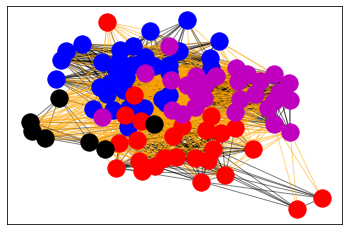

In [32]:
#plot A2, but exclude those are not connected to the rest of graph,
excludeNode2=sum(A2)==0
excludeNodeIndex2=np.where(excludeNode2)[0]
#print(excludeNodeIndex2)
excludeMSmajor2=np.delete(MSmajor,excludeNodeIndex2)
excludeMScounter=Counter(excludeMSmajor2)
excludeMS=[0]
for i in range(M):
    excludeMS=np.append(excludeMS,[excludeMScounter[i]],0)
print(excludeMS)
excludeMScumsum=np.cumsum(excludeMS)
print(excludeMScumsum)


nodeLeft2=sum(excludeNode2==False)
if nodeLeft2<N:
    A2exclude=np.reshape(A2,(N,N))
    A2exclude=np.delete(A2exclude,excludeNodeIndex2,0)
    A2exclude=np.delete(A2exclude,excludeNodeIndex2,1)
    #print(A2exclude)
    print(A2exclude.shape)

    G2v2=nx.Graph()
    G2v2.add_nodes_from([i for i in range(nodeLeft2)])
    
    G2v2edgeSame=np.empty((0,2))
    G2v2edgeDiff=np.empty((0,2))
    for i in range(nodeLeft2):
        major1=excludeMSmajor2[i]
        for j in range(i, nodeLeft2):
            major2=excludeMSmajor2[j]
            if A2exclude[i,j]==1:
                G2v2.add_edge(i,j)
                if major1==major2: #same major, color coded edge
                    G2v2edgeSame=np.append(G2v2edgeSame,np.array([[i,j]]),0)
                else:
                    G2v2edgeDiff=np.append(G2v2edgeDiff,np.array([[i,j]]),0)
                    #print(G2edgeDiff)

            else: continue

    #nx.draw(G2v2)
    
    pos2v2 = nx.spring_layout(G2v2)  # positions for all nodes
    #colorVector=['b','r','m','k','g','brown','orange','cyan'] #create a long vector to accomodate more major selection
    #print(colorVector)

   
    for j in range(M):
        nx.draw_networkx_nodes(G2v2, pos2v2, nodelist=range(excludeMScumsum[j],excludeMScumsum[j+1]), node_color=colorVector[j])
        #nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="b", **options)


    nx.draw_networkx_edges(G2v2, pos2v2, edgelist=G2v2edgeSame.tolist(),width=1.0, alpha=0.5,edge_color='black')
    nx.draw_networkx_edges(G2v2, pos2v2, edgelist=G2v2edgeDiff.tolist(),width=1.0, alpha=0.5,edge_color='orange')
